---
title: Multivariate Time Series Classification -  Human Activity Data from Wireless Sensor Network
format:
    html:
        code-fold: false
jupyter: python3
---

# Dataset

[Download the AReM data from isc](https://archive.ics.uci.edu/ml/datasets/Activity+Recognition+system+based+on+Multisensor+data+fusion+%5C%28AReM%5C%29)

This dataset contains temporal data from a Wireless Sensor Network worn by an actor performing the activities: bending, cycling, lying down, sitting, standing, walking. It contains 7 folders that represent seven types of activities. In each folder, there are multiple files each of which represents an instant of a human performing an activity. Each file containis 6 time series collected from activities of the same person, which are called avg rss12, var rss12, avg rss13, var rss13, vg rss23, and ar rss23. There are 88 instances in the dataset, each of which contains 6 time series and each time series has 480 consecutive values.

### Split into train and test folders

In [ ]:



def remove_empty_dirs(train_dir, test_dir):
    for d in (train_dir, test_dir):
        if os.path.exists(d):
            shutil.rmtree(d)
        os.makedirs(d)

def ensure_dirs():
    for activity in os.listdir(root_dir):
        activity_path = os.path.join(root_dir, activity)
        if not os.path.isdir(activity_path):
            continue
        os.makedirs(os.path.join(train_dir, activity))
        os.makedirs(os.path.join(test_dir, activity))
        
        if activity in bending_folders:
            test_ids = {1, 2}
        else:
            test_ids = {1, 2, 3}
        split_test_train_data(activity, activity_path, test_ids)


def split_test_train_data(activity, activity_path, test_ids):
        for fname in os.listdir(activity_path):
            if not fname.lower().endswith(".csv"):
                continue
            try:
                idx = int(fname.replace("dataset", "").replace(".csv", ""))
            except ValueError:
                continue
            src = os.path.join(activity_path, fname)
            if idx in test_ids:
                dst = os.path.join(test_dir, activity, fname)
            else:
                dst = os.path.join(train_dir, activity, fname)
            shutil.copy(src, dst)

remove_empty_dirs(train_dir, test_dir)
ensure_dirs()

In [8]:
import os
import shutil
import pandas as pd
root_dir = "activity+recognition+system+based+on+multisensor+data+fusion+arem 2"
train_dir = os.path.join(root_dir, "train")
test_dir = os.path.join(root_dir, "test")
bending_folders = ("bending1", "bending2")

In [52]:
file_path = '/Users/mishkin/Desktop/USC Classes/EE559_local/Homework4/activity+recognition+system+based+on+multisensor+data+fusion+arem 2/bending2/dataset1.csv'
df = pd.read_csv(file_path, comment='#', header=None, names=colnames)

with open(file_path, 'r') as f:
    lines = [next(f) for _ in range(10)]

for i, line in enumerate(lines, start=1):
    print(f"Line {i}: {line.rstrip()}")

Line 1: # Task: bending2
Line 2: # Frequency (Hz): 20
Line 3: # Clock (millisecond): 250
Line 4: # Duration (seconds): 120
Line 5: # Columns: time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23
Line 6: 0,23.75,0.43,24.00,0.00,24.67,0.47
Line 7: 250,22.67,0.94,24.00,0.00,24.67,0.94
Line 8: 500,21.33,0.47,24.00,0.00,24.75,0.83
Line 9: 750,21.00,0.00,24.00,0.00,25.25,1.09
Line 10: 1000,23.00,0.71,23.75,0.43,24.75,0.83


### Clean Dataset 4 for bending 2 due to parsing error

In [40]:
def col4_bending2():
    cols = ['time',
            'avg_rss12','var_rss12',
            'avg_rss13','var_rss13',
            'avg_rss23','var_rss23']

    df_clean = pd.read_csv(
        '/Users/mishkin/Desktop/USC Classes/EE559_local/Homework4/train/bending2/dataset4.csv',   # ← your actual path here
        comment='#',header=None, names=cols,delim_whitespace=True                    )

    return df_clean



### 1 - Time Series Features


time series capture the behavior of a signal over a specificed window collected at certain intervals. There is no domain transformation involved in the time series data. Often, statistical information is collecte about the signal:

- min is used to show the smallest bound of a signal
- max is used to show the upper bound of a signal
- mean  of the signal over a specific time window. 
- standard devation 
- Zero-Crossings: counts the instances when the signal transits through a zero value.
- Cross-Correlation: measure similarity between two signals relative to delay
- Number of Peaks and Troughs



### 2  - Extraction

Extracting the time-domain features minimum, maximum, mean, median, standard deviation, first quartile, and third quartile for all of the 6 time series in each instance.


In [12]:
instance_dict = {}
colnames = ['time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']
#list index: time-series
#format: {activity_dataset_num1: [[min, max, mean, median, standard_dev, 1st_quartile, 3rd_quartile]]}


In [39]:
instance_dict = {}
colnames = ['time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']
bend4_special = '/Users/mishkin/Desktop/USC Classes/EE559_local/Homework4/train/bending2/dataset4.csv'

#get all  colmn statistics for a dataframe sample
def get_all_stats(df):
    stats = []
    for col in df.columns[1:]:
        min_val = df[col].min()
        max_val = df[col].max()
        mean_val = df[col].mean()
        median_val = df[col].median()
        std_dev = df[col].std()
        first_quartile = df[col].quantile(0.25)
        third_quartile = df[col].quantile(0.75)
        stats.append([min_val, max_val, mean_val, median_val, std_dev, first_quartile, third_quartile])
    return stats

In [ ]:


def iterate_over_files():
    for activity in os.listdir(root_dir):
        activity_path = os.path.join(root_dir, activity)
        if not os.path.isdir(activity_path):
            continue
        for fname in os.listdir(activity_path):
            if not fname.lower().endswith(".csv"):
                continue
            file_path = os.path.join(activity_path, fname)
            if file_path == bend4_special:
                df = col4_bending2() # Special case for bending2 dataset4
            else:
                df = pd.read_csv(file_path,comment='#', header=None, names=colnames,engine='python', on_bad_lines='skip')
            stats = get_all_stats(df)
            fname_key = f"{activity}_{fname.replace('.csv', '')}"
            print(f"Stats for {fname_key}: {stats}")
            instance_dict[fname_key] = stats  

iterate_over_files()
  

In [ ]:
display(instance_dict)

In [83]:
stats = ['min', 'max', 'mean', 'median', 'std', '1st_quart', '3rd_quart']
n_series = 6

records = []
index = []
for key, arr in instance_dict.items():
    flat_arr = []
    for time_series_features in arr:     
        flat_arr.extend(time_series_features)  
    records.append(flat_arr)
    index.append(key)

columns = []
for i in range(1, n_series+1):
    for stat in stats:
        columns.append(f'{stat}{i}')

df = pd.DataFrame(records, index=index, columns=columns)
df.index.name = 'Instance'

display(df)

,min1,max1,mean1,median1,std1,1st_quart1,3rd_quart1,min2,max2,mean2,...,std5,1st_quart5,3rd_quart5,min6,max6,mean6,median6,std6,1st_quart6,3rd_quart6
Instance,,,,,,,,,,,,,,,,,,,,,
bending1_dataset7,36.25,48.00,43.969125,44.50,1.618364,43.310,44.67,0.0,1.50,0.413125,...,3.318301,20.5000,23.7500,0.0,2.96,0.555312,0.490,0.487826,0.0000,0.830
bending1_dataset6,37.00,48.00,43.454958,43.25,1.386098,42.500,45.00,0.0,1.58,0.378083,...,2.488862,22.2500,24.0000,0.0,5.26,0.679646,0.500,0.622534,0.4300,0.870
bending1_dataset4,33.00,47.75,42.179812,43.50,3.670666,39.150,45.00,0.0,3.00,0.696042,...,3.849448,30.4575,36.3300,0.0,2.18,0.613521,0.500,0.524317,0.0000,1.000
bending1_dataset5,33.00,45.75,41.678063,41.75,2.243490,41.330,42.75,0.0,2.83,0.535979,...,2.411026,28.4575,31.2500,0.0,1.79,0.383292,0.430,0.389164,0.0000,0.500
bending1_dataset1,37.25,45.00,40.624792,40.50,1.476967,39.250,42.00,0.0,1.30,0.358604,...,2.188449,33.0000,36.0000,0.0,1.92,0.570583,0.430,0.582915,0.0000,1.300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cycling_dataset12,18.50,44.25,35.752354,36.00,4.614802,33.000,39.33,0.0,12.60,3.328104,...,3.120057,14.0000,18.0625,0.0,9.39,3.069667,2.770,1.748326,1.7975,4.060
cycling_dataset15,24.25,45.00,37.177042,36.25,3.581301,34.500,40.25,0.0,8.58,2.374208,...,2.890347,17.9500,21.7500,0.0,9.34,2.921729,2.500,1.852600,1.5000,3.900
cycling_dataset14,23.33,43.50,36.248768,36.75,3.824632,33.415,39.25,0.0,9.71,2.737307,...,3.617405,15.7500,21.0000,0.0,11.15,3.532463,3.110,1.965267,2.1700,4.625


### 3 - Standard Deviation

Estimating the standard deviation of each of the time-domain features extracted from the data. We build a 90% bootsrap confidence interval for the standard deviation of each feature.

In [ ]:
#bootstrap sample
#We need to re-create 1000 samples of each feature. each value can be drawn from original feature with replacement 
col = [1,2,3,4,6,3,2,3]
def bootstrap(col):
    bootstrap_list = []
    bootstrap_arr = np.random.choice(col, size= (len(col), 1000), replace= True)
    #compute the standard deviation of each column
    bootstrap_std = bootstrap_arr.std(axis=0, ddof =1)
    lower_ci = np.quantile(bootstrap_std, 0.05)
    upper_ci = np.quantile(bootstrap_std, 0.95)
    return [bootstrap_std.mean(),lower_ci, upper_ci]

train_stats_std_b = train_stats.apply(bootstrap, axis =0)
train_stats_std = train_stats.std(axis =0, ddof=1)
train_stats_std_b.rename(index= {0: "b_std", 1: "l_ci", 2: "u_ci"}, inplace=True)
train_stats_std.name = 'std'
compare_std = pd.concat([train_stats_std ,train_stats_std_b.T], axis=1, )
display(compare_std)


rows = []
for feat in train_stats.columns:
    col = train_stats[feat]
    bs = np.random.choice(col, size=(len(col),1000), replace=True)
    sds = bs.std(axis=0, ddof=1)
    for val in sds:
        rows.append({'feature': feat, 'bootstrap_sd': val})

df_boot = pd.DataFrame(rows)
display(df_boot)
# Use FacetGrid to plot each feature's distribution side-by-side
g = sns.FacetGrid(df_boot, col='feature', col_wrap=6, sharex=False, sharey=False, height=2.5)
g.map(sns.histplot, 'bootstrap_sd', stat='density', kde=True)


for ax in g.axes.flat:
    feat = ax.get_title().split(' = ')[1]
    sds = df_boot.loc[df_boot['feature']== feat, 'bootstrap_sd']
    l_ci = np.quantile(sds, .05)
    h_ci = np.quantile(sds, .95)
    ax.axvline(l_ci, color='red', linestyle='--')
    ax.axvline(h_ci, color ='red', linestyle ='--')
plt.tight_layout()
plt.show()

In [82]:
display(ci_df)

,feature,obs_sd,ci_lower,ci_upper
0,min1,9.515445,8.272678,10.785692
1,max1,4.369322,3.338807,5.297051
2,mean1,5.305297,4.710636,5.894650
3,median1,5.409056,4.804663,6.008572
4,std1,1.762087,1.569118,1.948228
5,1st_quart1,6.118809,5.573342,6.657207
6,3rd_quart1,5.109643,4.335365,5.856706
7,min2,0.000000,0.000000,0.000000
8,max2,5.033882,4.623830,5.403929
9,mean2,1.565228,1.395385,1.703508


![Scatterplot of aggregate time domain features](scatterplot.png "Title")


### 4 - Best Time domain features

Features that have larger standard deviations are often more informative for distinguishing between different conditions. We would also like features that provide characteristic representation of the signal. Therefore, we can use:

- min: captures the lower extremes of the signal

- max: captures the upper extremes of the signal

 - mean: captures the central tendancy of the signal

### 5 - Scatterplots of Best Time Domain Features 
- skip over dataset 1,2, in bending, and 1,2,3 in all others to seperate training from test instances

In [ ]:
import matplotlib.pyplot as plt
series = [1,2,6]
feat = ['min', 'max', 'mean']
cols = [ '_'.join([ft,str(ser)]) for ft in feat for ser in series]
rows = [f"bending1_{x}" for x in range(3, 8)]
rows = [f"bending2_{x}" for x in range(3, 8)]
train_stats_main_ft = train_stats[cols]
train_stats_main_ft.loc[[f"bending1_dataset{x}" for x in range(3,8)] , 'category'] = 'bending'
train_stats_main_ft.loc[[f"bending2_dataset{x}" for x in range(3,7)] , 'category'] = 'bending'
train_stats_main_ft['category'].fillna("other", inplace=True)
display(train_stats_main_ft)
sns.pairplot(train_stats_main_ft, hue = 'category')


![Best Time Domain Features](best_timedomain.png "Title")

# Time Series Classification: Binary and Multiclass Classification

### 1 - Chunking Time Series Instances and Plotting


We break each time series in our training set into two (approximately) equal length time series. Now instead of 6 time series for each of the training instances, we have 12 time series for each training instance. Again, we depict scatter plots of the features extracted from both parts of the time series 1,2, and 6. 

- the scatterplot of both the classes (bending and non-bending) appear to be slightly more separable and eaiser to see when we split the time series data and compute the min, max, median, std, 25th, and 75th percentile.

In [ ]:
root_dir = "/Users/mishkin/Desktop/USC Classes/EE559_local/Homework4"
train_dir = os.path.join(root_dir, "train")
test_dir = os.path.join(root_dir, "test")

In [ ]:
def iterate_training_files():
    colnames = ['time','avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']
    instance_dict = {}
    for activity in os.listdir(train_dir):
        activity_path = os.path.join(train_dir, activity)
        if not os.path.isdir(activity_path):
            continue
        for fname in os.listdir(activity_path):
            if not fname.lower().endswith(".csv"):
                continue
            file_path = os.path.join(activity_path, fname)
            if file_path == bend4_special:
                df = col4_bending2() # Special case for bending2 dataset4
            else:
                df = pd.read_csv(file_path,comment='#', header=None, names=colnames,engine='python', on_bad_lines='skip')
            fname_key = f"{activity}_{fname.replace('.csv', '')}"
            instance_dict[fname_key] = df
    return instance_dict

dataframes = iterate_training_files()
print(len(dataframes))

In [ ]:
def get_stats(dataframes):
    stats_dict = {}
    for fname, (df1, df2) in dataframes.items():
            stats_1 = get_all_stats(df1)
            stats_2 = get_all_stats(df2)
            stats_dict[f"{fname}_split1"] = stats_1  
            stats_dict[f"{fname}_split2"] = stats_2  
    return stats_dict

stat_dict = get_stats(dataframes)



def flatten_stats(stats_dict):
        stats = ['min', 'max', 'mean', 'median', 'std', '1st_quart', '3rd_quart']
        n_series = 6
        records = []
        index = []
        for key, arr in stat_dict.items():
                flat_arr = []
                for time_series_features in arr:     
                        flat_arr.extend(time_series_features)  
                records.append(flat_arr)
                index.append(key)

        columns = []
        for i in range(1, n_series+1):
                for stat in stats:
                        columns.append(f'{stat}{i}')
        df = pd.DataFrame(records, index=index, columns=columns)
        df.index.name = 'Instance'
        return df

df = flatten_stats(stat_dict)
display(df)

,min1,max1,mean1,median1,std1,1st_quart1,3rd_quart1,min2,max2,mean2,...,std5,1st_quart5,3rd_quart5,min6,max6,mean6,median6,std6,1st_quart6,3rd_quart6
Instance,,,,,,,,,,,,,,,,,,,,,
bending1_dataset7_split1,36.67,45.00,43.486208,43.710,1.281976,42.33,44.50,0.0,1.30,0.378667,...,4.271610,19.2500,24.00,0.0,2.28,0.524875,0.470,0.486847,0.0000,0.8300
bending1_dataset7_split2,36.25,48.00,44.452042,44.500,1.771251,44.25,44.75,0.0,1.50,0.447583,...,1.929494,21.0000,23.50,0.0,2.96,0.585750,0.500,0.487918,0.4225,0.8300
bending1_dataset6_split1,39.00,48.00,44.117042,45.000,1.359836,43.50,45.00,0.0,1.30,0.250042,...,2.967487,21.7500,24.25,0.0,5.26,0.815417,0.710,0.718016,0.4300,1.1200
bending1_dataset6_split2,37.00,46.50,42.792875,42.670,1.058792,42.50,43.00,0.0,1.58,0.506125,...,1.881721,22.5000,23.75,0.0,4.06,0.543875,0.500,0.473445,0.4300,0.7100
bending1_dataset4_split1,33.75,47.75,43.278875,45.000,3.473355,42.00,45.25,0.0,3.00,0.673292,...,1.650105,36.0000,37.00,0.0,1.53,0.640958,0.765,0.554542,0.0000,1.2200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cycling_dataset14_split2,23.33,43.50,36.160000,36.500,3.991725,33.31,39.27,0.0,9.63,2.775958,...,3.427143,16.1875,21.00,0.0,11.15,3.533958,3.085,1.994636,2.1700,4.5075
cycling_dataset8_split1,26.25,43.40,36.865417,36.250,3.462793,34.31,40.00,0.0,7.46,2.387250,...,3.009900,13.7500,18.25,0.0,8.26,2.964792,2.500,1.655499,1.6550,4.0375
cycling_dataset8_split2,29.25,44.25,37.049500,36.415,3.411449,34.50,40.25,0.0,8.64,2.452917,...,2.681881,14.3300,18.00,0.0,8.34,2.904458,2.570,1.609793,1.6900,3.7700


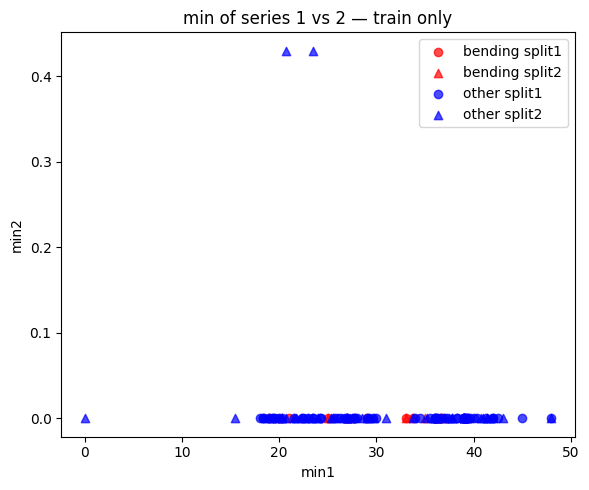

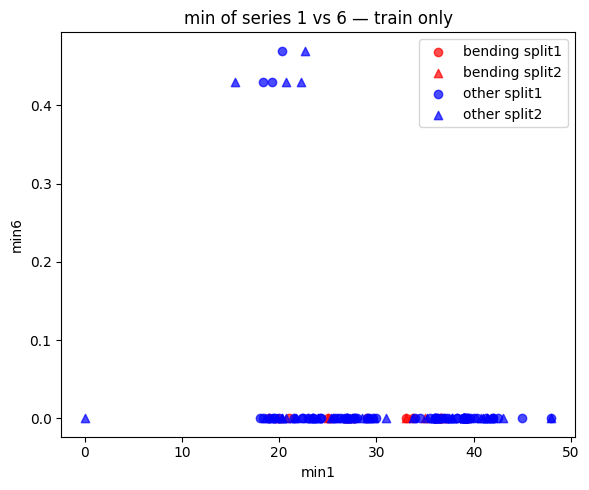

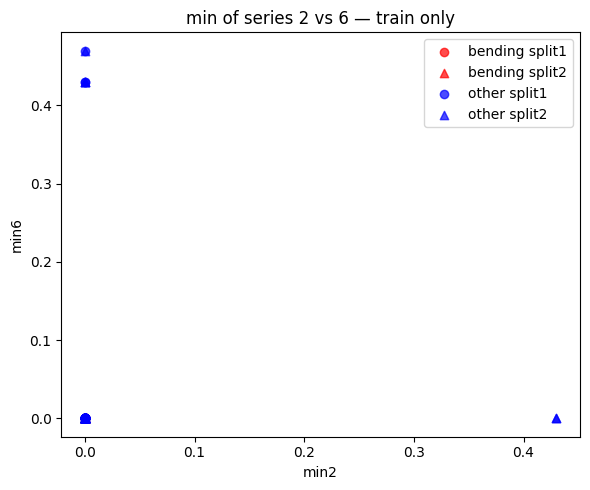

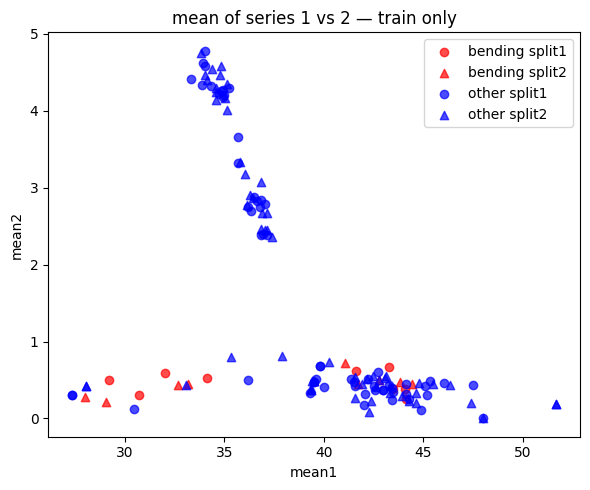

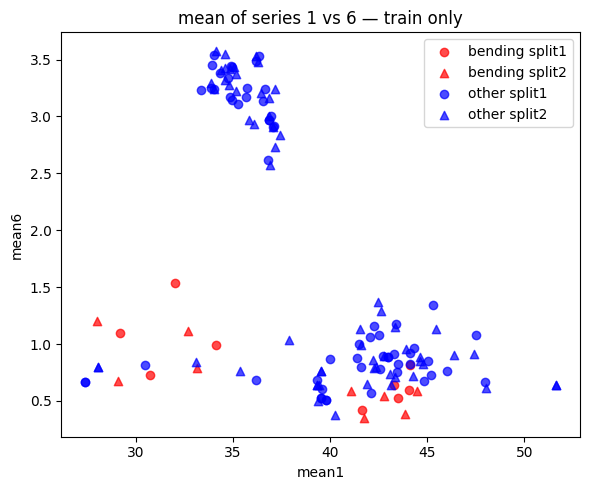

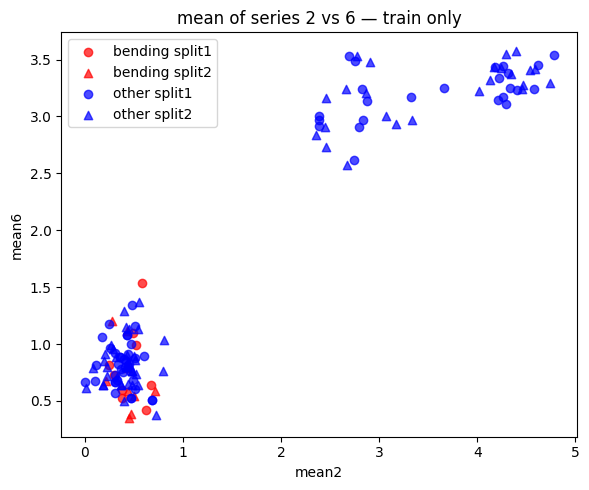

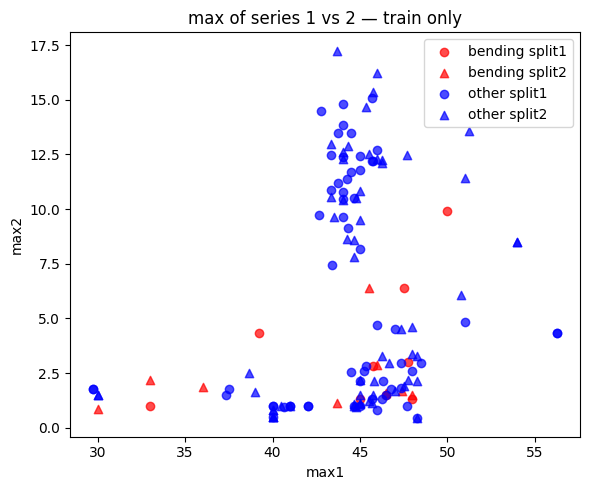

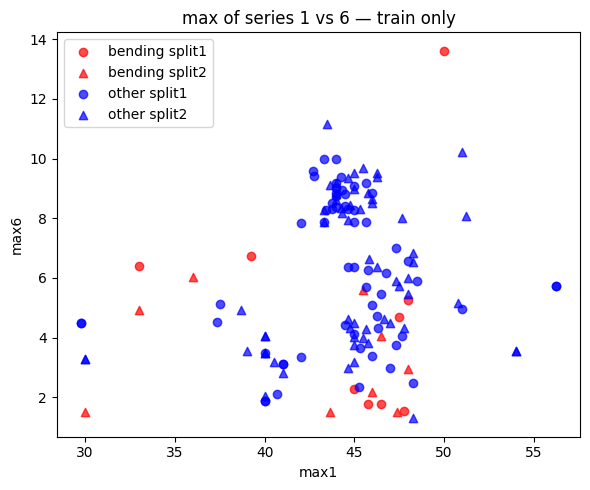

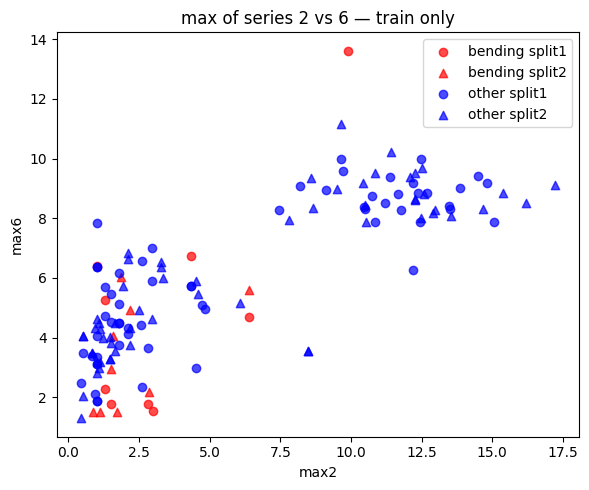

In [ ]:

def is_test_instance(idx):
    activity, rest = idx.split('_dataset')
    ds = rest.split('_')[0]
    if activity in ('bending1','bending2'):
        return ds in ('1','2')
    else:
        return ds in ('1','2','3')

# build your masks
test_mask   = df.index.map(is_test_instance)
train_mask  = ~test_mask
is_bending  = df.index.str.startswith('bending')
is_split1   = df.index.str.endswith('_split1')
is_split2   = df.index.str.endswith('_split2')

series = [1,2,6]
stats  = ['min','mean','max']
pairs  = [(i,j) for i in series for j in series if i<j]

for stat in stats:
    for i,j in pairs:
        x = f'{stat}{i}'
        y = f'{stat}{j}'

        plt.figure(figsize=(6,5))
        # bending split1
        plt.scatter(
            df.loc[train_mask & is_bending & is_split1, x],
            df.loc[train_mask & is_bending & is_split1, y],
            c='red', marker='o', label='bending split1', alpha=0.7
        )
        # bending split2
        plt.scatter(
            df.loc[train_mask & is_bending & is_split2, x],
            df.loc[train_mask & is_bending & is_split2, y],
            c='red', marker='^', label='bending split2', alpha=0.7
        )
        # other split1
        plt.scatter(
            df.loc[train_mask & ~is_bending & is_split1, x],
            df.loc[train_mask & ~is_bending & is_split1, y],
            c='blue', marker='o', label='other split1', alpha=0.7
        )
        # other split2
        plt.scatter(
            df.loc[train_mask & ~is_bending & is_split2, x],
            df.loc[train_mask & ~is_bending & is_split2, y],
            c='blue', marker='^', label='other split2', alpha=0.7
        )

        plt.xlabel(x)
        plt.ylabel(y)
        plt.title(f"{stat} of series {i} vs {j} — train only")
        plt.legend(loc='best')
        plt.tight_layout()
        plt.show()

## Time Series Segmentation Comparison: RFE versus Logistic Regression + L1

### Binary Classification with RFE + P-value Model Approach 


We break each time series in our training set into l ∈ {1, 2, . . . , 20} time series of approximately equal length and use logistic regression to solve the binary classification problem, using time-domain features.


-  we calculate the p-values for our logistic regression parameters in each model corresponding to each value of l and refit a logistic regression model using our pruned set of features. 
-  Use 5-fold cross-validation to determine the best value of the pair (l, p), where p is the number of features used in recursive feature elimination. 

- Since we want to let our algorithm gain the knowledge of the various predictors available, the correct way would be to do the RFE along with Cross Validation.


- feature dimension d(42) grows with ℓ as 42ℓ

### 1- SKLEARN Transformer Class
- ℓ: Number of splits for each time series instance
- dynamically build training dataframes of size (69, 42 * ℓ)

[source for transformer object](https://medium.com/@pgshanding/creating-custom-transformers-in-python-and-scikit-learn-10767487017e)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin


class TimeSeriesFeaturizer(BaseEstimator, TransformerMixin):
    def __init__(self, n_splits=1):
        self.n_splits = n_splits
        self._stat_funcs = [
            np.nanmin,
            np.nanmax,
            np.nanmean,
            np.nanmedian,
            lambda x: np.nanstd(x, ddof=1),
            lambda x: np.nanpercentile(x, 25),
            lambda x: np.nanpercentile(x, 75),
        ]

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        rows = []
        for df in X:
            df_copy = df.copy()
            data = df_copy.iloc[:, 1:].to_numpy(dtype=float)  # shape (T, n_series)
            T, n_series = data.shape
            inst_feats = []
            #for each time series, compute the 7 features
            for idx in range(n_series):
                #select the column from corrspdongin to the time series data
                time_series = data[:, idx]
                #split the time series data into n_splits 
                splits = np.array_split(time_series, self.n_splits)
                #in every split, #compute every feature (7) for this time series channel (out of 6)
                for split in splits:
                    for fn in self._stat_funcs:
                        #we will have a list of 7 features  * l_splits for each time series
                        inst_feats.append(fn(split))
                #repeat to appen the next 7 features  * l_splits for all time series (6)
            #each row (sample) in the output will contain 7*6* l_splits features 
            rows.append(inst_feats)
        return np.asarray(rows)


In [ ]:
raw_dfs_train = []   
y = []   
for key, df in dataframes.items():
    raw_dfs_train.append(df)  
    y.append(1 if key.startswith('bending') else 0)
y = np.array(y, dtype=int)

print(f"Number of DataFrames in raw_dfs: {len(raw_dfs_train)}")
print("Columns in raw_dfs[0]:", list(raw_dfs_train[0].columns))

In [ ]:
import numpy as np
import sys
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline


pipe = Pipeline([
    ('featurize', TimeSeriesFeaturizer()),
    ('selector', RFECV(
        estimator=LogisticRegression(solver='liblinear', C=sys.maxsize),
        step=1,
        cv=StratifiedKFold(5, shuffle=True, random_state=1),  
        scoring='roc_auc',
        n_jobs=-1,
        min_features_to_select=1
    ))
])

param_grid = {'featurize__n_splits': list(range(1,21))}
outer_cv   = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

grid = GridSearchCV(pipe, param_grid=param_grid, cv=outer_cv, scoring='roc_auc',n_jobs=-1,refit=True)
grid.fit(raw_dfs_train, y)

print("Best ℓ:", grid.best_params_['featurize__n_splits'])
print("Best p:", grid.best_estimator_.named_steps['selector'].n_features_)
print("Outer‐CV ROC‐AUC:", grid.best_score_)


**Best ℓ**: 2

**Best p:** 4

**Outer‐CV ROC‐AUC:** 1.0

In [ ]:
final_model = grid.best_estimator_

### 2 - RFE + p-value Classifier: AUC and ROC on Training Data

We report the confusion matrix and show the ROC and AUC for our classifier on train data. We report the parameters of our logistic regression βi ’s as well as the p-values associated with them.

Confusion matrix (train):
[[60  0]
 [ 0  9]]


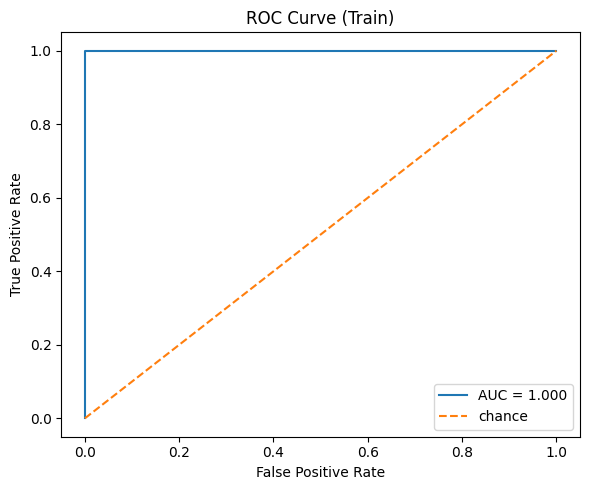

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

y_pred_prob = final_model.predict_proba(raw_dfs_train)[:, 1]
y_pred = final_model.predict(raw_dfs_train)

cm = confusion_matrix(y, y_pred)
print("Confusion matrix (train):")
print(cm)

fpr, tpr, thresholds = roc_curve(y, y_pred_prob)
auc_score = roc_auc_score(y, y_pred_prob)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.3f}")
plt.plot([0,1], [0,1], '--', label="chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Train)")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()





|     **Confusion Matrix (Train)**         | Predicted 0 | Predicted 1 |
| ------------ | ----------- | ----------- |
| **Actual 0** | 60          | 0           |
| **Actual 1** | 0           | 9           |


In [ ]:
import statsmodels.api as sm

X_full = final_model.named_steps['featurize'].transform(raw_dfs_train)
mask   = final_model.named_steps['selector'].support_
X_sel  = X_full[:, mask]
X_sm   = sm.add_constant(X_sel)

logit_model = sm.Logit(y, X_sm)
result=logit_model.fit(maxiter = 10)
result.summary()

         Current function value: 0.000022
         Iterations: 10


/Users/mishkin/Desktop/USC Classes/EE559_local/.venv/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                   69
Model:                          Logit   Df Residuals:                       43
Method:                           MLE   Df Model:                           25
Date:                Tue, 15 Jul 2025   Pseudo R-squ.:                  0.9999
Time:                        09:47:11   Log-Likelihood:             -0.0015323
converged:                      False   LL-Null:                       -26.718
Covariance Type:            nonrobust   LLR p-value:                 0.0007868
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.2870    621.018     -0.009      0.993   -1222.459    1211.885
x1             0.1499     29.832      0.005      0.996     -58.319      58.619
x2             1.6624    103.556      0.016      0.987    -201.304     204.628
x3            -1.5198     77.650     -0.020      0.984    -153.710     150.671
x4            -1.4596    128.997     -0.011      0.991    -254.288     251.369
x5            -0.7231    123.478     -0.006      0.995    -242.735     241.289
x6             1.5962     64.833      0.025      0.980    -125.475     128.668
x7            -1.4437     30.268     -0.048      0.962     -60.768      57.880
x8             0.7432     35.295      0.021      0.983     -68.435      69.921
x9             2.4598    104.890      0.023      0.981    -203.121     208.041
x10           -0.3915     43.320     -0.009      0.993     -85.297      84.513
x11            0.7134     86.018      0.008      0.993    -167.878     169.305
x12           -0.7760     82.758     -0.009      0.993    -162.979     161.427
x13            0.4047     26.193      0.015      0.988     -50.932      51.742
x14            0.2386     28.401      0.008      0.993     -55.426      55.903
x15           11.8560    330.609      0.036      0.971    -636.125     659.838
x16           -1.8487    132.386     -0.014      0.989    -261.321     257.624
x17           -5.7389    167.384     -0.034      0.973    -333.806     322.328
x18           -3.4516    135.440     -0.025      0.980    -268.909     262.006
x19           -0.3535     14.827     -0.024      0.981     -29.413      28.706
x20            1.8497    104.655      0.018      0.986    -203.270     206.969
x21           -4.3567     88.373     -0.049      0.961    -177.564     168.851
x22           -1.4647    104.504     -0.014      0.989    -206.289     203.359
x23            0.4390     35.094      0.013      0.990     -68.345      69.223
x24            1.2981     52.323      0.025      0.980    -101.253     103.849
x25           -7.9668    158.703     -0.050      0.960    -319.019     303.086
==============================================================================

Possibly complete quasi-separation: A fraction 0.94 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

### 3 - RFE + p-value Classifier on Test Set
Testing the classifier on the test set. We transform the test set into the same number of time series pur training set was broke into based on the rsults of RFE using ℓ = 4.

- Classifier was tested using the features extracted from the test set. 

- Compared the accuracy on the test set with the cross-validation accuracy we obtained previously.

In [ ]:

def iterate_testing_files():
    colnames = ['time','avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']
    test_dict = {}
    for activity in os.listdir(test_dir):
        activity_path = os.path.join(test_dir, activity)
        if not os.path.isdir(activity_path):
            continue
        for fname in os.listdir(activity_path):
            if not fname.lower().endswith('.csv'):
                continue
            file_path = os.path.join(activity_path, fname)
            if file_path == bend4_special:
                df = col4_bending2()
            else:
                df = pd.read_csv(file_path,comment='#',header=None, names=colnames, engine='python', on_bad_lines='skip')
            key = f"{activity}_{fname.replace('.csv','')}"
            test_dict[key] = df
    return test_dict

test_dataframes = iterate_testing_files()

raw_dfs_test = []
y_test       = []
for key, df in test_dataframes.items():
    raw_dfs_test.append(df)
    y_test.append(1 if key.startswith('bending') else 0)
y_test = np.array(y_test, dtype=int)

test_accuracy = final_model.score(raw_dfs_test, y_test)
print(f"Test set accuracy: {test_accuracy:.3f}")

from sklearn.metrics import confusion_matrix
y_pred_test = final_model.predict(raw_dfs_test)
cm_test = confusion_matrix(y_test, y_pred_test, labels=[0,1])
print("Confusion matrix (test):")
print(cm_test)

print(f"Mean outer‐CV accuracy was {np.mean(outer_scores):.3f}")
print(f"Test accuracy is           {test_accuracy:.3f}")


| Metric                 | Value |
| ---------------------- | ----- |
| Test accuracy          | 1.000 |
| Mean outer-CV accuracy | 0.971 |


|        Confusion Matrix      | Predicted 0 | Predicted 1 |
| ------------ | ----------- | ----------- |
| **Actual 0** | 15          | 0           |
| **Actual 1** | 0           | 4           |


### 6 - Observations


#### Peformance: 
- The test accuracy is very similar to the cross-validation accuracy.

#### Well-seperated classes?
- The classes are not not well separated; this is why we had to use the stratified split to deal with the class imbalance and reduce instability in the logistic regression parameter calculations.


### 7 - Imbalance + Case Control
 - There are 15 positive anf 4 negative samples in the test set. and 60 positive(bending), while only 9 negative in the training set.

- we mst undersample the majority class (non-bending) down to the size of the minority (bending)

Given the above, we train a logistic regression model on a case-controlled training set to see whether we can get better results.

In [ ]:
raw_dfs_train = []   
y = []   
for key, df in dataframes.items():
    raw_dfs_train.append(df)  
    y.append(1 if key.startswith('bending') else 0)
y = np.array(y, dtype=int)

print(f"Number of DataFrames in raw_dfs: {len(raw_dfs_train)}")
print("Columns in raw_dfs[0]:", list(raw_dfs_train[0].columns))

raw_dfs_test = []
y_test       = []
for key, df in test_dataframes.items():
    raw_dfs_test.append(df)
    y_test.append(1 if key.startswith('bending') else 0)
y_test = np.array(y_test, dtype=int)

Number of DataFrames in raw_dfs: 69
Columns in raw_dfs[0]: ['time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']


Confusion matrix (test, case–control):
[[15  0]
 [ 0  4]]


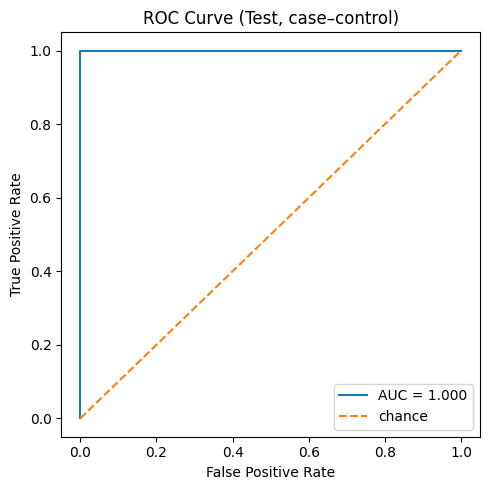

In [ ]:
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt

featurizer = final_model.named_steps['featurize']
selector = final_model.named_steps['rfe']
X_train_full = featurizer.transform(raw_dfs_train)
mask = selector.support_

X_train_sel  = X_train_full[:, mask]
X_test_full  = featurizer.transform(raw_dfs_test)
X_test_sel = X_test_full[:, mask]

X_maj = X_train_sel[y==0]
y_maj = y[y==0]
X_min = X_train_sel[y==1]
y_min = y[y==1]

X_maj_down, y_maj_down = resample(X_maj, y_maj, replace=False,n_samples=len(y_min),random_state=42)
X_bal = np.vstack((X_maj_down, X_min))
y_bal = np.concatenate((y_maj_down, y_min))

clf = LogisticRegression(solver='liblinear')
clf.fit(X_bal, y_bal)


y_test_prob = clf.predict_proba(X_test_sel)[:,1]
y_test_pred = clf.predict(X_test_sel)

cm = confusion_matrix(y_test, y_test_pred, labels=[0,1])
print("Confusion matrix (test, case–control):")
print(cm)
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
auc_score  = roc_auc_score(y_test, y_test_prob)
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.3f}")
plt.plot([0,1],[0,1],'--',label="chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Test, case–control)")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


Confusion matrix (balanced train):
[[9 0]
 [0 9]]


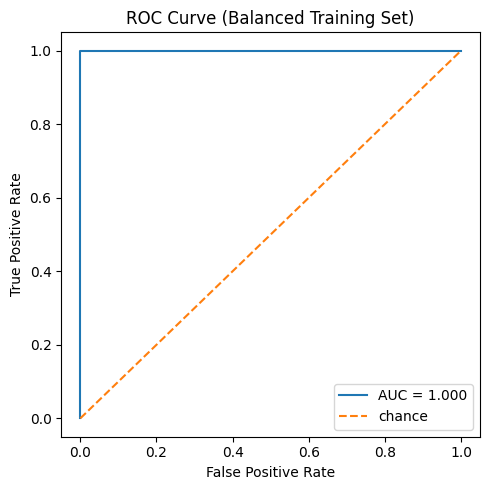

In [ ]:
y_bal_pred = clf.predict(X_bal)
y_bal_prob = clf.predict_proba(X_bal)[:, 1]

cm_bal = confusion_matrix(y_bal, y_bal_pred, labels=[0,1])
print("Confusion matrix (balanced train):")
print(cm_bal)
fpr_bal, tpr_bal, _ = roc_curve(y_bal, y_bal_prob)
auc_bal = roc_auc_score(y_bal, y_bal_prob)

plt.figure(figsize=(5,5))
plt.plot(fpr_bal, tpr_bal, label=f"AUC = {auc_bal:.3f}")
plt.plot([0,1], [0,1], '--', label="chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Balanced Training Set)")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

## Binary Classification Using L1-penalized logistic regression

### 1 - Time Series Segmentation and L1 Binary Regression Model

In [ ]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score


pipe_l1 = Pipeline([
    ('featurize', TimeSeriesFeaturizer()),
    ('logreg', LogisticRegressionCV(penalty='l1', solver='liblinear', cv=5,scoring='accuracy', n_jobs=-1, max_iter=50))
])


param_grid = {'featurize__n_splits': list(range(1, 21)),}
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

grid_l1 = GridSearchCV(
    pipe_l1,
    param_grid=param_grid,
    cv=outer_cv,          
    scoring='accuracy',
    n_jobs=-1,
    refit=True
)


grid_l1.fit(raw_dfs_train, y)

best_l = grid_l1.best_params_['featurize__n_splits']
best_C = grid_l1.best_estimator_.named_steps['logreg'].C_[0]

print(f"Best number of splits ℓ: {best_l}")
print(f"Best inverse‐penalty C:   {best_C:.2e}")
print(f"Outer‐CV accuracy:        {grid_l1.best_score_:.3f}")

X_test_feats = grid_l1.best_estimator_.named_steps['featurize'].transform(raw_dfs_test)
mask = grid_l1.best_estimator_.named_steps['logreg'].coef_.ravel() != 0
X_test_sel = X_test_feats[:, mask]

# Predict & report accuracy
y_pred_test  = grid_l1.best_estimator_.named_steps['logreg'].predict(X_test_feats)
test_acc  = accuracy_score(y_test, y_pred_test)
print(f"Test accuracy (L1 model): {test_acc:.3f}")


**Best number of splits ℓ**: 1 

**Best inverse‐penalty C**:   3.59e-01

**Outer‐CV accuracy:**        0.986

**Test accuracy (L1 model):** 1.000

## Overall Comparison of Binary Classifiers

P-value + RFE often achieves perfect separation on the training set as notes with the AUC being close to 1 but tends to overfit to the trainign data in thise case. The likelihood function becomes unbounded due to perfect separation, and the p-values are shown as 1 -- counterintuitive to model coeff being statistically significant.


L1 was way easier to implement because it handles the feature seelction automatically and most libraris has build in support for l1-regression. The p values are harder to calclate and require R.



# Multiclass Classifier

we build an L1- penalized multinomial regression model to classify all activities.


### 1 - Time Series Segmentation + Multinomial Regression Model


In [ ]:
from sklearn.preprocessing import LabelEncoder

raw_dfs_train, y_train = [], []
for key, df in dataframes.items():
    raw_dfs_train.append(df)
    activity = key.split('_dataset')[0]
    y_train.append(activity)

raw_dfs_test, y_test = [], []
for key, df in test_dataframes.items():
    raw_dfs_test.append(df)
    activity = key.split('_dataset')[0]
    y_test.append(activity)

le = LabelEncoder().fit(y_train)  
y_train_enc = le.transform(y_train)
y_test_enc  = le.transform(y_test)
classes     = le.classes_     
n_classes   = len(classes)


In [ ]:
pipe_multi = Pipeline([
    ('featurize', TimeSeriesFeaturizer()), 
    ('logreg',   LogisticRegressionCV(solver='saga', multi_class='multinomial', cv=5,scoring='accuracy',n_jobs=-1, max_iter = 2000))
])

outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
param_grid = {'featurize__n_splits': list(range(1,21))}

grid_multi = GridSearchCV(
    pipe_multi,
    param_grid=param_grid,
    cv=outer_cv,   
    scoring='accuracy',
    n_jobs=-1,
    refit=True, 
)

grid_multi.fit(raw_dfs_train, y_train_enc)

best_l  = grid_multi.best_params_['featurize__n_splits']
best_C  = grid_multi.best_estimator_.named_steps['logreg'].C_[0]
cv_accuracy  = grid_multi.best_score_

print(f"Best ℓ = {best_l}, best C = {best_C:.2e}, outer‐CV acc = {cv_accuracy:.3f}")


**Best ℓ** = 1,

**Best C** = 2.78e+00, 

**Outer‐CV ac**c = 0.798

### 2 - ROC and Confustion Matrix

Test‐set accuracy (multiclass): 0.789


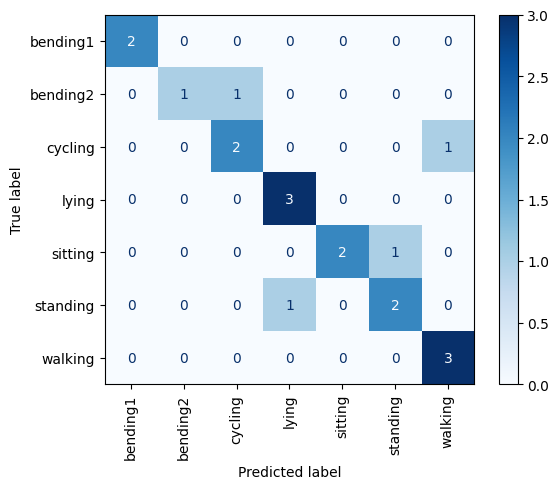

In [162]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
test_acc = grid_multi.score(raw_dfs_test, y_test_enc)
print(f"Test‐set accuracy (multiclass): {test_acc:.3f}")
y_pred_test = grid_multi.predict(raw_dfs_test)
cm = confusion_matrix(y_test_enc, y_pred_test, labels=range(n_classes))
disp = ConfusionMatrixDisplay(cm, display_labels=classes)
disp.plot(cmap="Blues", xticks_rotation="vertical")

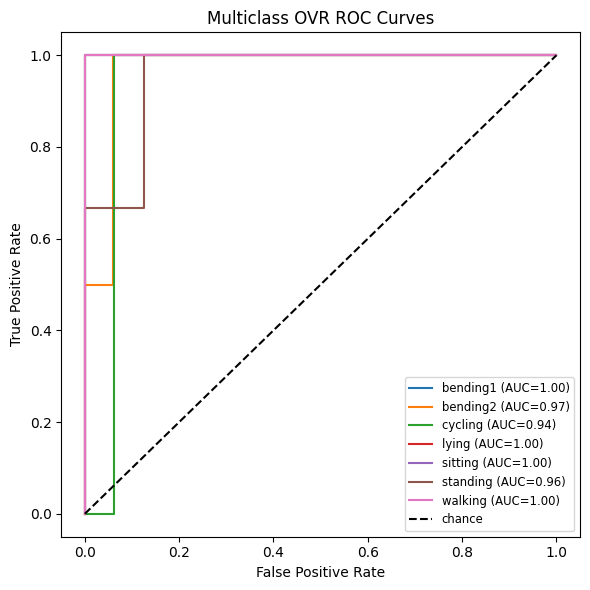

In [170]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
y_test_bin = label_binarize(y_test_enc, classes=range(n_classes))
y_score   = grid_multi.predict_proba(raw_dfs_test)

import matplotlib.pyplot as plt

fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = roc_auc_score(y_test_bin[:, i], y_score[:, i])

plt.figure(figsize=(6,6))
for i, cls in enumerate(classes):
    plt.plot(fpr[i], tpr[i], label=f"{cls} (AUC={roc_auc[i]:.2f})")
plt.plot([0,1],[0,1],'k--',label="chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass OVR ROC Curves")
plt.legend(loc="lower right", fontsize="small")
plt.tight_layout()
plt.show()


## Gaussian Naive Bayes versus Multinomial Naive Bayes

### 1 - Time Series Segmentation and Model

GNB: best ℓ = 18, CV acc = 0.841
MNB: best ℓ = 1, CV acc = 0.927
GNB test accuracy = 0.684
MNB test accuracy = 1.000


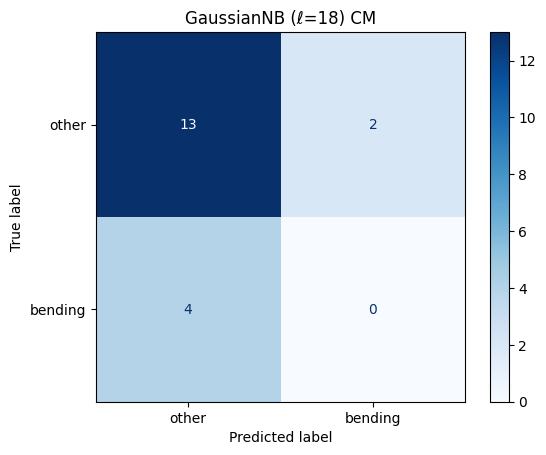

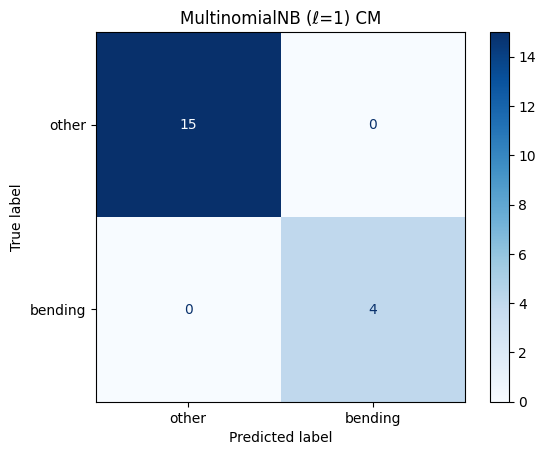

In [171]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import ConfusionMatrixDisplay

pipe_gnb = Pipeline([
    ('featurize', TimeSeriesFeaturizer()), 
    ('gnb',       GaussianNB())
])
pipe_mnb = Pipeline([
    ('featurize', TimeSeriesFeaturizer()), 
    ('mnb',       MultinomialNB())
])

param_grid = {'featurize__n_splits': list(range(1,21))}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

grid_gnb = GridSearchCV(pipe_gnb, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
grid_mnb = GridSearchCV(pipe_mnb, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)

grid_gnb.fit(raw_dfs_train, y)
grid_mnb.fit(raw_dfs_train, y)

best_l_gnb = grid_gnb.best_params_['featurize__n_splits']
cv_acc_gnb = grid_gnb.best_score_
best_l_mnb = grid_mnb.best_params_['featurize__n_splits']
cv_acc_mnb = grid_mnb.best_score_

print(f"GNB: best ℓ = {best_l_gnb}, CV acc = {cv_acc_gnb:.3f}")
print(f"MNB: best ℓ = {best_l_mnb}, CV acc = {cv_acc_mnb:.3f}")

best_gnb = grid_gnb.best_estimator_
best_mnb = grid_mnb.best_estimator_
test_acc_gnb = best_gnb.score(raw_dfs_test, y_test)
test_acc_mnb = best_mnb.score(raw_dfs_test, y_test)

print(f"GNB test accuracy = {test_acc_gnb:.3f}")
print(f"MNB test accuracy = {test_acc_mnb:.3f}")

for name, clf in [('GaussianNB', best_gnb), ('MultinomialNB', best_mnb)]:
    y_pred = clf.predict(raw_dfs_test)
    cm = confusion_matrix(y_test, y_pred, labels=[0,1])
    disp = ConfusionMatrixDisplay(cm, display_labels=['other','bending'])
    disp.plot(cmap='Blues')
    plt.title(f"{name} (ℓ={clf.named_steps['featurize'].n_splits}) CM")
    plt.show()


## Gaussian Naive Bayes with PCA Reduction
- using the previosuly computed best_ℓ for the  Naive Bayes Gaussian classifier, we select the best number of features (p-value)  using PCA components via cross-validation
- Gaussian Bayes assumes independent features, and PCA can help reduce correlation between features

In [166]:
raw_dfs_train = []   
y = []   
for key, df in dataframes.items():
    raw_dfs_train.append(df)  
    y.append(1 if key.startswith('bending') else 0)
y = np.array(y, dtype=int)

print(f"Number of DataFrames in raw_dfs: {len(raw_dfs_train)}")
print("Columns in raw_dfs[0]:", list(raw_dfs_train[0].columns))

raw_dfs_test = []
y_test       = []
for key, df in test_dataframes.items():
    raw_dfs_test.append(df)
    y_test.append(1 if key.startswith('bending') else 0)
y_test = np.array(y_test, dtype=int)

Number of DataFrames in raw_dfs: 69
Columns in raw_dfs[0]: ['time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']


In [ ]:
from sklearn.decomposition import PCA

pipe = Pipeline([
    ('featurize', TimeSeriesFeaturizer(n_splits=best_l)),
    ('pca',       PCA()),           
    ('nb',        GaussianNB())
])

max_p = min(len(raw_dfs_train), 42 * best_l)
param_grid = {'pca__n_components': list(range(2, max_p+1, 2))}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
grid = GridSearchCV(pipe, param_grid, cv=cv, scoring='accuracy', n_jobs=-1, refit=True)
grid.fit(raw_dfs_train, y_train_enc)

best_p = grid.best_params_['pca__n_components']
cv_acc_pca = grid.best_score_
print(f"Best ℓ = {best_l}, Best # PCs = {best_p}, CV accuracy = {cv_acc_pca:.3f}")
test_acc_pca = grid.score(raw_dfs_test, y_test_enc)
print(f"Test‐set accuracy (PCA + NB): {test_acc_pca:.3f}")

X_train_feats = grid.best_estimator_.named_steps['featurize'].transform(raw_dfs_train)
pca = grid.best_estimator_.named_steps['pca']
X2 = pca.transform(X_train_feats)[:, :2]

plt.figure(figsize=(6,5))
for cls in range(len(classes)):
    mask = (y_train_enc == cls)
    plt.scatter(X2[mask,0], X2[mask,1], alpha=0.7, label=classes[cls])
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.title(f"PCA scatter (ℓ={best_l}, p={best_p})")
plt.legend(loc="best", fontsize="small")
plt.tight_layout()
plt.show()

y_pred_test = grid.predict(raw_dfs_test)
cm = confusion_matrix(y_test_enc, y_pred_test, labels=range(len(classes)))
disp = ConfusionMatrixDisplay(cm, display_labels=classes)
disp.plot(cmap="Blues", xticks_rotation="vertical")
plt.title("Confusion Matrix (PCA + NB)")
plt.tight_layout()
plt.show()


**Best ℓ** = 1

**Best # PCs** = 8

**CV accuracy** = 0.868

**Test‐set accuracy (PCA + NB):** 0.842

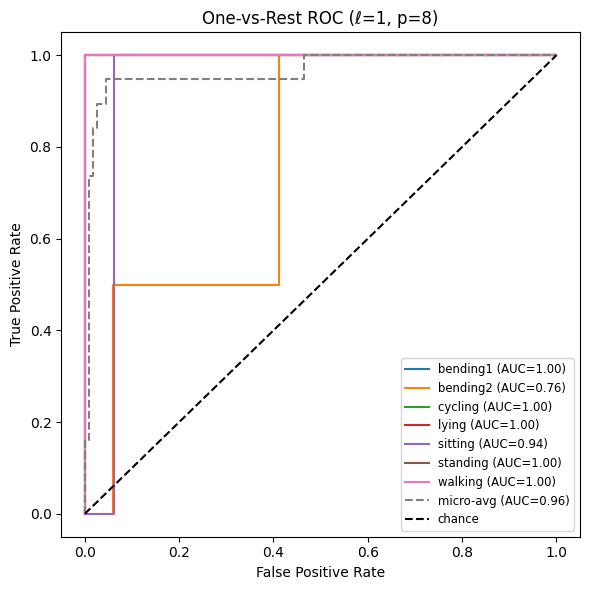

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, roc_auc_score
import numpy as np

y_test_bin = label_binarize(y_test_enc, classes=np.arange(len(classes)))
y_score   = grid.predict_proba(raw_dfs_test)

plt.figure(figsize=(6,6))
for i, cls in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    auc = roc_auc_score(y_test_bin[:, i], y_score[:, i])
    plt.plot(fpr, tpr, label=f"{cls} (AUC={auc:.2f})")

fpr_micro, tpr_micro, _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
auc_micro = roc_auc_score(y_test_bin, y_score, average="micro")
plt.plot(fpr_micro, tpr_micro, '--', color='gray', label=f"micro-avg (AUC={auc_micro:.2f})")
plt.plot([0,1], [0,1], 'k--', label="chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"One-vs-Rest ROC (ℓ={best_l}, p={best_p})")
plt.legend(loc="lower right", fontsize="small")
plt.tight_layout()
plt.show()


# Summary of Multiclass Classification Models

The Multinomial Naive Bayes Classifier is better for multi-class classification since its AUC per class is better than boththe  Gaussian Naive Bayes as well as logistic regression with L1 regularization